# Capítulo 4 - Treinando Modelos

Vamos analisar o modelo de regressão linear, um dos modelos mais simples que existem. Há 2 maneiras bem diferentes de treiná-lo.
- Usando uma equação direta de forma fechada, que calcula os parâmetros do modelo que melhor se ajustam no conjunto de treinamento. (minimizam a função de custo)
- Usando gradiente descendente (gd), que ajusta gradualmente os parâmetros do modelo para minimizar a função de custo e acaba convergindo para o mesmo conjunto de parâmetros.
- Regressão polinomial, um modelo mais complexo que pode se ajustar a conjuntos de dados não lineares.


## Regressão Linear
Predição do modelo de regressão linear
y = θ0 + θ1x1 + θ2x2 + ... + θnxn
- y é o valor previsto
- n é o numero das características
- xi é o valor da i-ésima característica
- θj é o j-ésimo parâmetro

Nosso objetivo é encontrar os parâmetros que minimizem o erro MSE (Mean Squared Error), ou seja, achar o mínimo global da função MSE.

MSE (X, hθ) = 1/m ∑(θ^Txi - yi)2

Podemos utilizar a **Equação normal** para isso.
θ = (X^TX)^{-1} X^T y
(depois arrumar a formatação)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
# Calculando o θ usando a equação normal
X_b = np.c_[np.ones((100, 1)), X] # Concatena arrays tipo np.array([[1, 0], [1, 1], [1, 2]])
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.36862289],
       [3.11127591]])

### Exemplo
Supondo que eu queira prever as vendas de sorvete me baseando na temperatura do dia, em que:

X = [20, 22, 25, 27, 30]

y = [50, 60, 70, 80, 90]

Encontramos os parâmetros θ ótimos minimizando o erro com a equação normal e depois podemos calcular o y de outros valores X.

In [3]:
# Outro exemplo gerado pelo ChatGPT

# Supondo que eu queira prever as vendas de sorvete me baseando na temperatura do dia.

X = np.array([[20], [22], [25], [27], [30]])  # Temperatura
y = np.array([[50], [60], [70], [80], [90]])  # Vendas

X_b = np.c_[np.ones((5, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

y_pred = np.dot(X_b, theta_best)
y_pred

array([[50.89171975],
       [58.85350318],
       [70.79617834],
       [78.75796178],
       [90.70063694]])

In [4]:
# Se quiser prever novos valores pode colocar 
X_new = np.array([[40], [30], [50]])
X_new_b = np.c_[np.ones((3, 1)), X_new]
y_pred_2 = np.dot(X_new_b, theta_best)
y_pred_2

array([[130.50955414],
       [ 90.70063694],
       [170.31847134]])

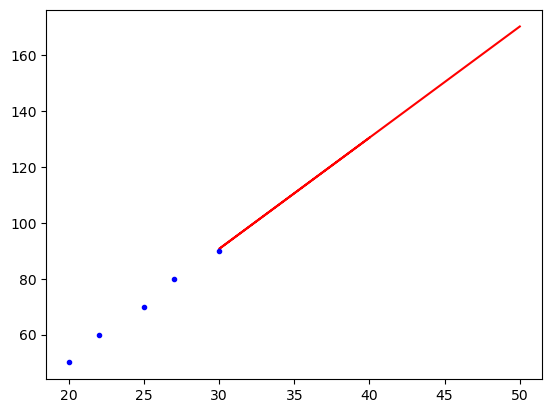

In [5]:
plt.plot(X_new.ravel(), y_pred_2.ravel(), "r-")
plt.plot(X.ravel(), y.ravel(), "b.")
plt.show()

Agora usando Scikit-learn é simples:

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# theta best
lin_reg.intercept_, lin_reg.coef_

(array([-28.72611465]), array([[3.98089172]]))

In [7]:
lin_reg.predict(X_new)

array([[130.50955414],
       [ 90.70063694],
       [170.31847134]])

## Gradiente Descendente (Gradient Descent)
(Se adapta melhor aos casos que existe um grande número de características).

É um algoritmo de otimização genérico que consegue identificar as ótimas soluções. A ideia do gradiente descendente é **ajustar os parâmetros com o intuito de minimizar uma função de custo**. (assim como a equação normal né)

### Como funciona?
O gradiente descendente calcula o gradiente local da função de erro em relação ao vetor de parâmetro θ e segue em direção ao gradiente descendente.

**Quando gradiente é 0, atingiu o mínimo**.

1. Você preenche θ com valores aleatórios (inicialização aleatória)
2. Aprimora-o gradualmente tentando diminuir a função de custo a cada etapa até que alcance o mínimo

Um parâmetro importante é o tamanho das etapas, determinado pelo hiperparâmetro da *taxa de aprendizado*. 

Se a taxa de aprendizado for muito pequena, o algoritmo precisará passar por muitas iterações para convergir. Se for muito grande, pode acabar do outro lado, em um lugar mais alto do que estava antes.

### Implementação - Gradiente descendente em batch
É preciso calcular o quanto a função de custo vai mudar caso você modifique o θ (derivada parcial)
dMSE/dθj = 2/m ∑(θ^Txi - yi)xj

1. **Inicialização dos parâmetros**

Começamos com valores aleatórios (ou zeros) para os parâmetros \( \theta \):

\begin{bmatrix}
0 \\
0 \\
0 \\
\vdots
\end{bmatrix}
\]

---

2. **Cálculo do gradiente**

Calculamos o **gradiente** nesse ponto, ou seja, quanto a função de custo (MSE) muda
se modificarmos cada \( \theta_j \):

\[
\begin{bmatrix}
\frac{\partial MSE}{\partial \theta_0} \\
\frac{\partial MSE}{\partial \theta_1} \\
\vdots \\
\frac{\partial MSE}{\partial \theta_n}
\end{bmatrix}
\]

---

3. **Atualização dos parâmetros**

Atualizamos os parâmetros **na direção contrária ao gradiente** (porque queremos *minimizar* o erro, não aumentá-lo):

\[
\theta := \theta - \eta \cdot \nabla_{\theta} MSE
\]

onde \( \eta \) é a **taxa de aprendizado (learning rate)**.

---

4. **Iteração até convergência**

### Usar no Scikit-Learn
LinearRegression
SGDRegressor
Repetimos esse processo várias vezes até que o gradiente fique próximo de zero:

\[
\nabla_{\theta} MSE \approx 0
\]

Isso indica que estamos próximos de um **mínimo da função de custo**, ou seja, encontramos os **\( \theta \)** ótimos!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

X_b = np.c_[np.ones((100, 1)), X] 

In [9]:
eta = 0.1 # taxa de aprendizado
n_iterations = 1000
m = 100 

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.45544679],
       [3.02222039]])

### Gradiente descendente estocástico
O principal problema do gradiente descendente em batch é ele usar todo o conjunto de treinamento para calcular os gradientes a cada etapa, o que deixa muito lento quando o conjunto de treinamento é grande.

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # hiperparametros do cronograma de aprendizado

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.44884983],
       [3.00858248]])

### Gradiente descendente em mini-batch
É um meio termo entre o em batch e o estocástico. A cada etapa, ao invés de calcular os gradientes com base no conjunto completo ou de um em um, o GD mini-batch calcula em pequenos conjuntos aleatórios chamados mini-batches. 

### Usar no Scikit-Learn
Equação normal -> LinearRegression

Gradiente -> SGDRegressor

## Regressão Polinomial

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Nesse caso, uma linha reta nunca se ajustará a esses dados adequadamente. Para isso, podemos utilizar a classe PolynomialFeatures para transformar nossos dados, adicionando o quadrado de cada característica no conjunto de treinamento como uma nova característica.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-2.08646477]), array([-2.08646477,  4.35333522]))

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [21]:
lin_reg.intercept_, lin_reg.coef_

(array([2.2306947]), array([[1.05385022, 0.45959445]]))

O modelo de regressão polinomial de alto grau pode se sobreajustar aos dados de treinamento drasticamente, enquanto um modelo linear se subajusta.

- Para ser capaz de escolher o modelo correto, é só verificar se o desempenho deixa a desejar em ambos ou somente no conjunto de testes.
- Outra forma de saber é analisar as curvas de aprendizado: são gráficos do desempenho do modelo no conjunto de treinamento e no conjunto de validação como função do tamanho do conjunto de treinamento.

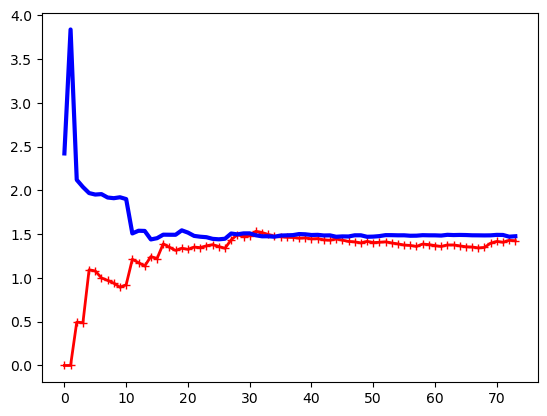

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

## Modelos Lineares Regularizados
Quando temos muitas features (variáveis) ou poucos dados, a regressão linear pode “decorar” os dados, ou seja, ter coeficientes muito grandes para se ajustar perfeitamente.
Então, para evitar overfitting, regularizamos o modelo. Para um modelo polinomial reduzimos o número de graus polinomiais.

### Regressão de Ridge
Aceita errar um pouco em troca de generalizar melhor. Adiciona um termo alpha Sum de i até n de θ²
